# Identification of Countries in direst need of aid using Clustering

#### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programs, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below:

#### Data dictionary

- country:  Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health: Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: Measurement of the annual growth rate of the GDP deflator
- life_expec`:The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer:The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


# Reading and Understanding the Dataset

In [1]:
# Importing the required  libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading the dataset
country_data = pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Displaying the information of the columns
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Displaying the numerical columns' information
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Displaying the shape of the dataframe
country_data.shape

(167, 10)

# Cleaning The Dataset

In [6]:
# Calculating the missing percentage by column
round(country_data.isnull().sum()/country_data.shape[0]*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- There are no missing rows in the dataset.  Also, all the columns are in required format so no need of changing the type of columns. We can proceed with the data transformation as there are some columns which are expressed in different perspective.

# Data Transformation

- From the data dictionary, the columns exports, health and imports are given in the form of % of GDP per capita, which has no clear meaning.
- This is because, mathematically, there can be some values present if given w.r.t to percentage, e.g. `same` values of exports/imports/heaths of % GDP per capita, but `different` values of % of GDP per capita.
-  Hence, to avoid this, we can convert those values into the normal independent values irrespective of the countries' % GDP per capita.

In [7]:
# Transforming the exports, health and imports columns into the indendepent values and ignoring the % of GDP per capita
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100

In [8]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


- From the information (info) and description (describe) of the dataset, we have seen the columns have different units and with different weightages, so we have to scale the data before model building.
-  We can continue with exploratory data analysis before scaling the columns.

# Exploratory Data Analysis

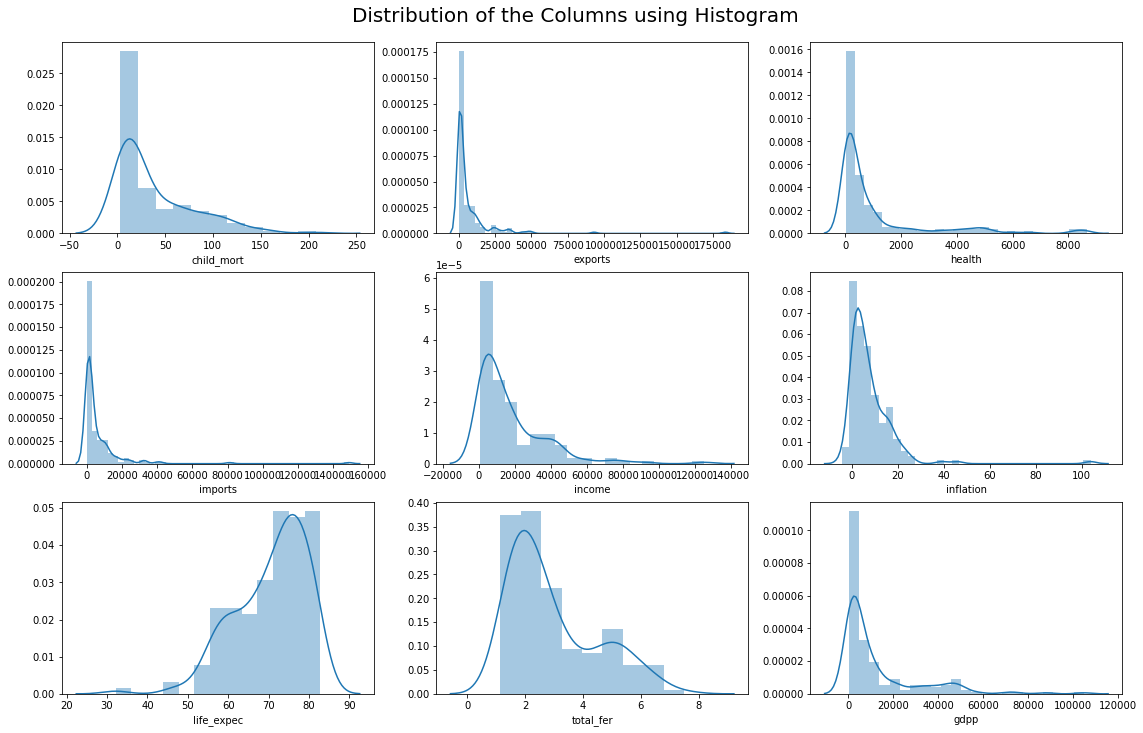

In [9]:
# Let's plot the distribution plots of all the numeric columns to see the distribution of values.
fig, ax = plt.subplots(3,3,figsize=(19,12))
fig.set_constrained_layout(True)
fig.suptitle('Distribution of the Columns using Histogram',fontsize=20,y=0.92)
column = 1;
for i in range(3):
    for j in range(3):
        sns.distplot(country_data.iloc[:,column],ax=ax[i,j])
        column+=1

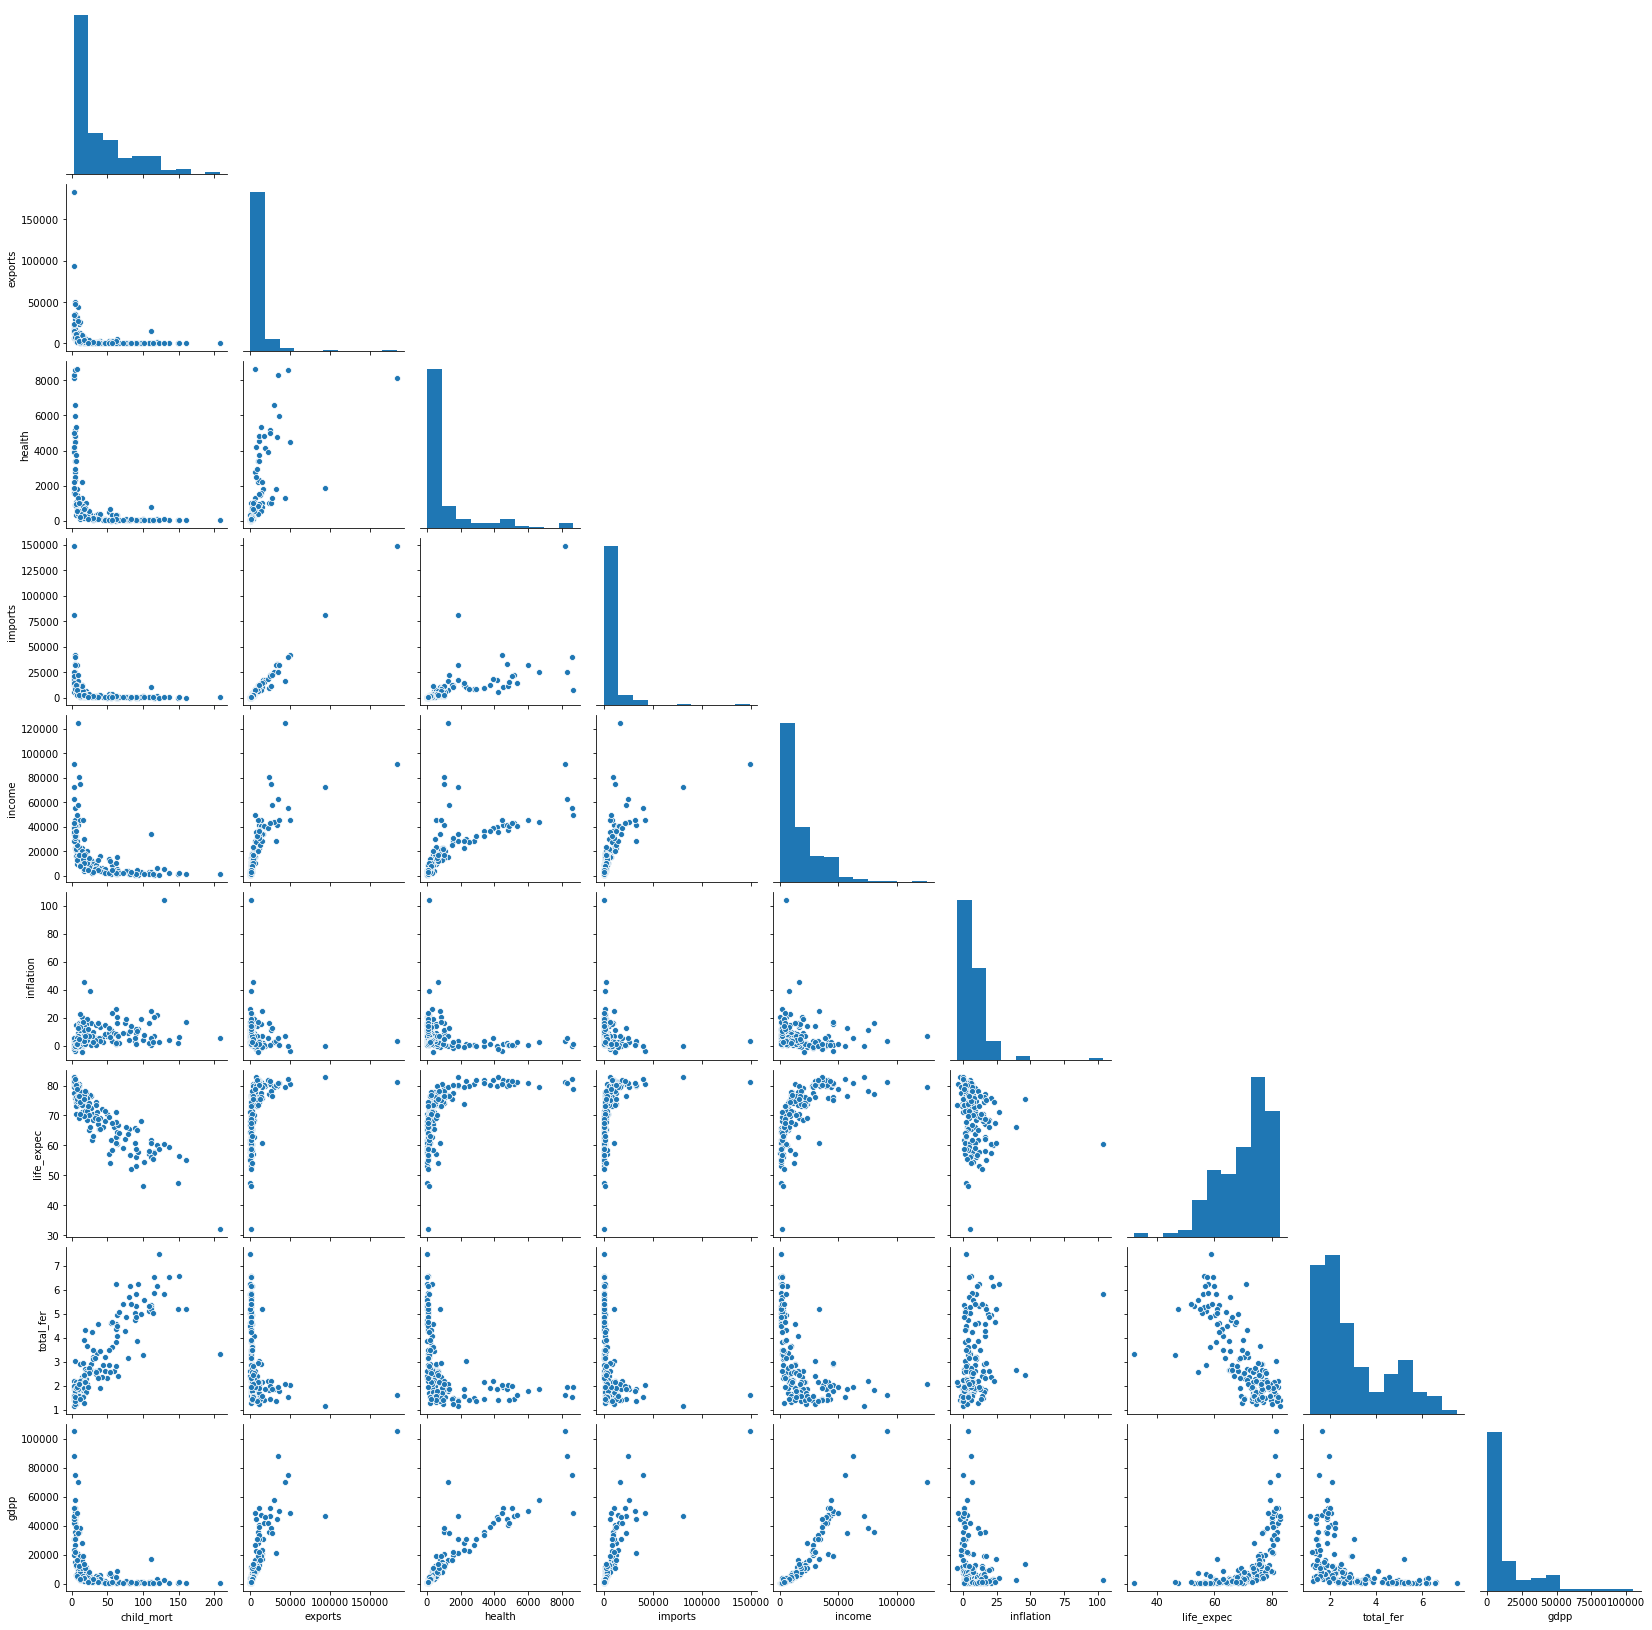

In [10]:
# Let's plot a pairplot of all the numeric columns
sns.pairplot(country_data.iloc[:,1:],corner=True)
plt.show()

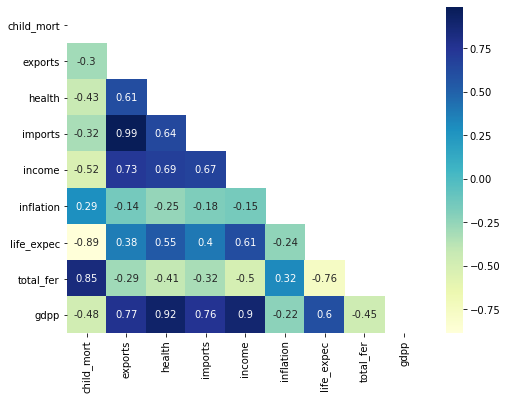

In [11]:
# Let's plot heatmap for all the numerical columns to analyze the relations between columns
plt.figure(figsize = (8,6))
mask = np.triu(np.ones_like(country_data.iloc[:,1:].corr()))
sns.heatmap(country_data.iloc[:,1:].corr(), mask=mask, cmap='YlGnBu', annot=True)
plt.show()

### Inferences:
- From Distribution plot, all the columns are not normally distributed and their values are of different units and magnitudes, so we can convert/scale all the numeric columns into some specific format afterwards.
- Also from Distribution plot, we can observe there outliers present. So, we have to handle the outliers from all the columns before proceeding to clustering.
- From Pairplot and Heatmap, there are some columns which are highly correlated to each other. Although, there the correlation won't affect the forming of clusters, but we can guess the status of the country by correlation itself.
    -  imports and exports are highly correlated, which means the country which has higher amount of imports of goods and services, is also exporting higher amount of goods and services.
    - gdpp and health are highly correlated to each other, which means higher the gdpp, higher the spendings on health.  So such countries are not required according to business objectives. But yes, those who have lower gdpp, should have lower spendings on health, and we need to consider such countries.
    - Same is the case with gdpp and income. Higher the gdpp, higher the income and vice versa. As those are highly correlated with each other.
    - There are several factors which are correlated with each other. Also, as mentioned in the business objectives, we can consider gdpp, child_mort and income columns only for clustering, as there are many other columns correlated with these, so that overall effect of clustering the countries is neutralized.

We can analyze first 5 countries which are in desperate need of the aid using bivariate analysis for each affecting factors using bar graphs.
We will plot information of first 5 countries for all the columns.

In [12]:
# Displaying the head
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
# Setting country as index for the better visualization and avoiding further calculations.
country_info = country_data.set_index('country')
country_info.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


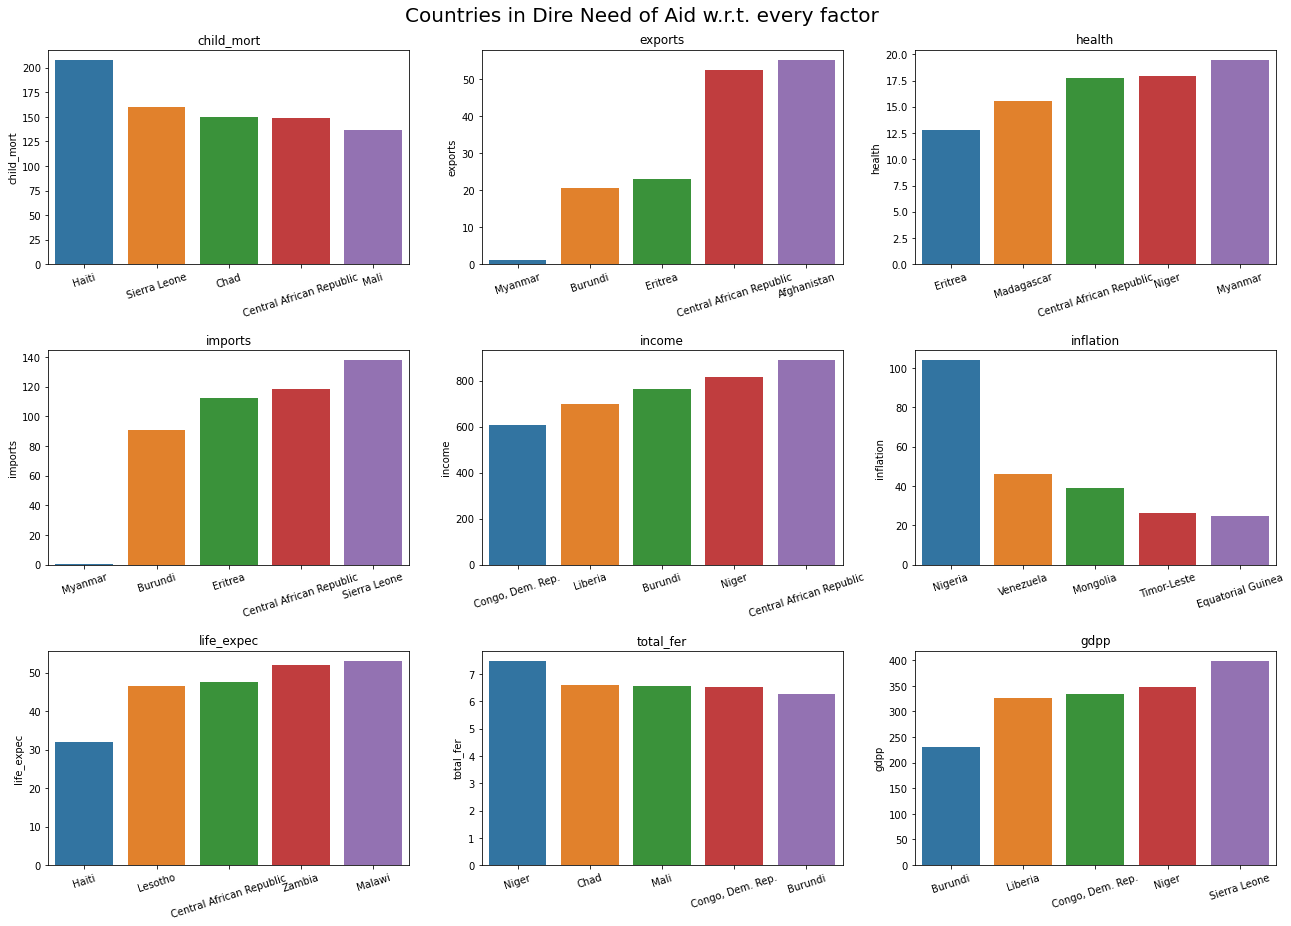

In [14]:
# Let's plot the countrywise plots of all the numeric columns to see the distribution of values.
fig, ax = plt.subplots(3,3,figsize=(22,15))
fig.set_constrained_layout(True)
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Countries in Dire Need of Aid w.r.t. every factor',fontsize=20,y=0.92)

sort_by = {column:True for column in country_info.columns}
# We need the higher values for child_mort, total_fer e.g. higher the child_mort value, the more the country in direst need of help
for col in ['child_mort','total_fer','inflation']:
    sort_by[col] = False
num = 0
for i in range(3):
    for j in range(3):
        col = list(sort_by)[num]
        sns.barplot(x='country', y= col,
                    data=country_data[['country',col]].sort_values(by=col,ascending=list(sort_by.values())[num]).head(),ax=ax[i,j])
        ax[i,j].tick_params(axis='x',labelrotation=18)
        ax[i,j].set_xlabel('')
        ax[i,j].set_title(col)
        num+=1

plt.show()

### Inferences
- There are some countries common w.r.t every factor which are in direst need of help from the above bar charts like Central African Republic, Burundi, Sierra Leone, Niger, etc.
- Based on the business objective, if we consider only one particular factor, then we might choose different countries, but the above visualization will help based on a particular factor.
- If child_mort rate is considered, Halti has highest child_mort rate. Other countries which might need help based on child_mort rate are Sierra Leone, Chad, Central African Republic, Mali, etc.
- Based on income, Congo. Dem. Rep. is the lowest income rate country (net income per person). Liberia, Burundi, Niger, Central African Republic, etc. are some countries with lowest net income per person and might need help.
- Based on gdpp, Burundi has lowest gdpp. Other countries with lowest gddp rate are Liberia, Congo. Dem. Rep., Niger, Sierra Leone.
- We can use a clustering model to cluster the countries and identify which countries are actually in direst need of help based on various factors instead of considering only one.

## Outlier Analysis

- As we have already seen from histogram, there are outliers present in the data. So might need to analyze all the columns first using box plots and then take decision for the outlier treatment.

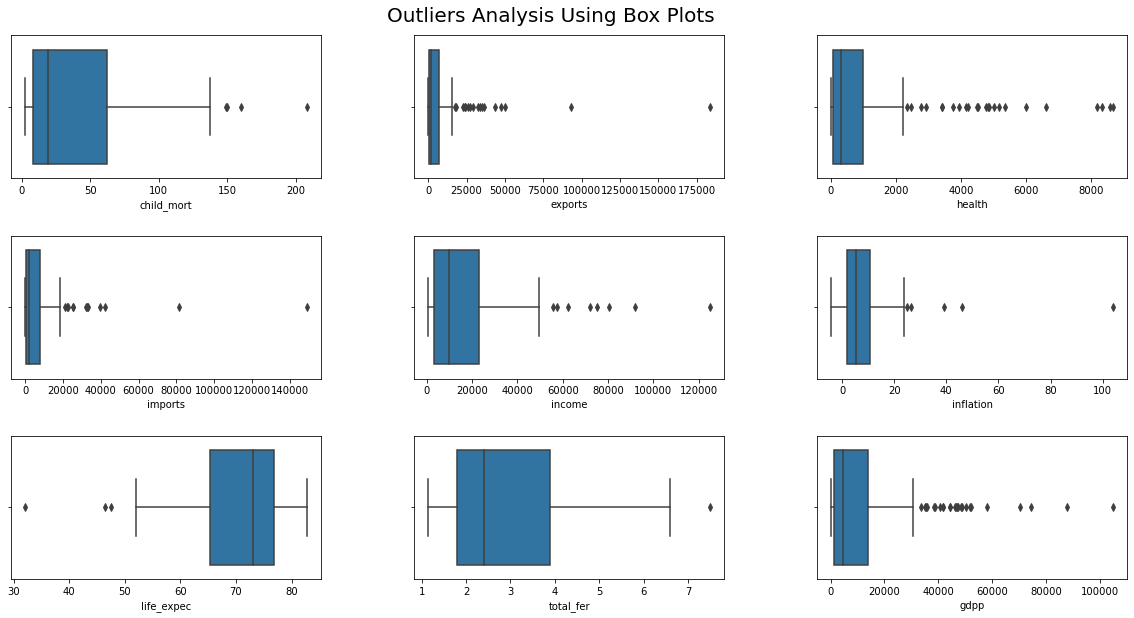

In [15]:
# Plotting the box plot for all the numeric columns
fig, ax = plt.subplots(3,3,figsize=(20,10))
fig.set_constrained_layout(True)
fig.subplots_adjust(hspace=0.4,wspace=0.3)
fig.suptitle('Outliers Analysis Using Box Plots',fontsize=20,y=0.92)
column = 0;
for i in range(3):
    for j in range(3):
        sns.boxplot(country_info.iloc[:,column],ax=ax[i,j])
        column+=1
plt.show()

- We can see there are outliers in many columns. gdpp and health columns have too many outliers compared to other column.
- `Since we have limited number of countries(167), removing all of these outliers would shrink the shape of data and and we may miss those countries that would have really deserved the Financial Aid`.
- One more point of view here, is if we keep all the outliers unchanged, it may impact the clustering model. So one way to handle such outliers is using soft capping the columns based on the objective, e.g. replacing values of data with higher gdpp, health , imports, exports and income with 99% quantile value might not harm our analysis, as those are slightly richer countries and might not be in direst need of an aid from the NGO. Where as, those countries who have very lower child mortality rate, can also not be in direst need of an aid.
-  Hence, we will use soft capping for exports, health, imports, income, gdpp. We can cap higher values and replace those with the 99% th percentile value. Also, for capping lower values of life_expec, we might miss some of the countries that are in direst need of aid. So we will not handle outliers for such columns.

In [16]:
# Capping the required countries using 99% of quantiles value.
# Capturing the values at 99% quantile into variables first.
qexports = country_info['exports'].quantile(0.99)
qimports = country_info['imports'].quantile(0.99)
qincome = country_info['income'].quantile(0.99)
qhealth = country_info['health'].quantile(0.99)
qgdpp = country_info['gdpp'].quantile(0.99)

# capping the gdpp and income values
country_info['gdpp'][country_info['gdpp']>qgdpp] = qgdpp
country_info['income'][country_info['income']>qincome] = qincome
country_info['health'][country_info['health']>qhealth] = qhealth
country_info['imports'][country_info['imports']>qimports] = qimports
country_info['exports'][country_info['exports']>qexports] = qexports

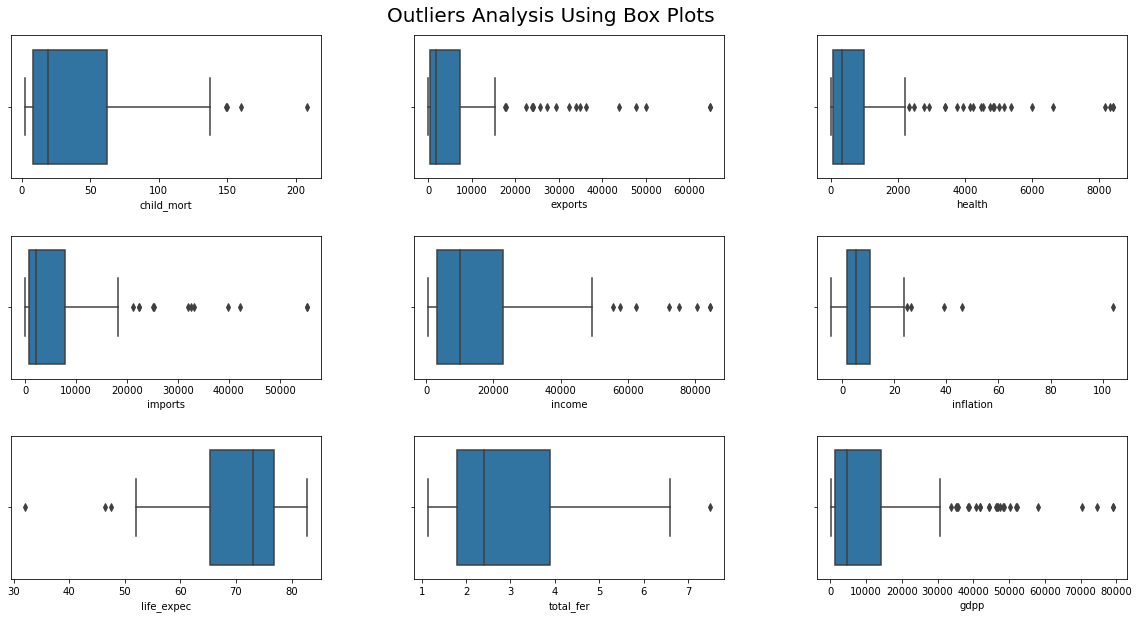

In [17]:
# Plotting the box plot again for all the numeric columns
fig, ax = plt.subplots(3,3,figsize=(20,10))
fig.set_constrained_layout(True)
fig.subplots_adjust(hspace=0.4,wspace=0.3)
fig.suptitle('Outliers Analysis Using Box Plots',fontsize=20,y=0.92)
column = 0;
for i in range(3):
    for j in range(3):
        sns.boxplot(country_info.iloc[:,column],ax=ax[i,j])
        column+=1
plt.show()

- This seems to be a acceptable range of outliers. Because before capping, the high values were far extreme values which are now brought to the nearest maximum value. Capping the outliers will increase the efficiency of the clustering model.

# Scaling the Data

In [18]:
# Scaling the data using StandardScalar
scaler = StandardScaler()

scaled_country_data = scaler.fit_transform(country_info)
scaled_country_data = pd.DataFrame(scaled_country_data)
scaled_country_data.columns = country_info.columns
scaled_country_data.index = country_info.index
scaled_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


# Modeling using K-Means Clustering

- `Before proceeding to model building, we first need to check whether the data has tendency to be clustered or not`.
- We can analyze this using Hopkins statistics before building the model directly and based on it's value, we can then take the decision whether the data can be clustered or not.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [19]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(scaled_country_data)

0.8833210591627592

As the hopekins value is 0.91 which is exactly within the range where it tells that the data has very high tendency for clustering, we can proceed with model building to identify the clusters.

## Finding the Optimal Number of Clusters

### SSD / Elbow Curve

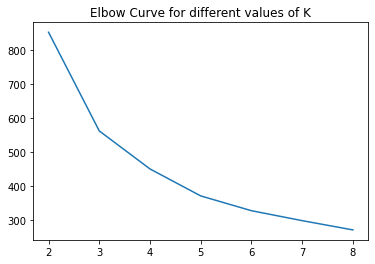

In [21]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_country_data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
sns.lineplot(x=range_n_clusters,y=ssd)
plt.title('Elbow Curve for different values of K')
plt.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

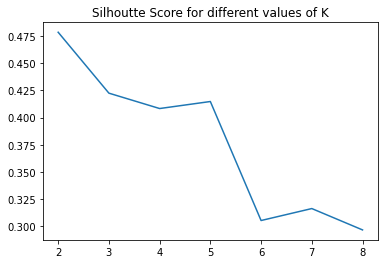

In [22]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_country_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_country_data, cluster_labels))
# plot the silhouette score for each n_clusters
sns.lineplot(x=range_n_clusters,y=silhouette_avg)
plt.title('Silhoutte Score for different values of K')
plt.show()

#### Inferences:
- From elbow curve, the value drops exponentially from 2 to 3 and it's very sharp. It also drops slightly from 3 to 4. Afterwards, it drops constantly and almost negligible.
- From silhoutte scores, we can say that the score for 2 clusters is high and which is obvious. But, as 2 clusters doesnot make any sense in correctly clustering or identifying the countries which are in direst need of help, we can consider 3 and 4 number of clusters for the analysis as their silhoutte score is acceptable.
- Hence, we can now build model using 3 and 4 clusters. And then, we can choose the efficient model from the results and interpret the results.

#### K-Means Clustering Using 3 Clusters

In [23]:
# model with k=3
kmeans_3_clusters = KMeans(n_clusters=3, max_iter=500, random_state=100)
kmeans_3_clusters.fit(scaled_country_data)

KMeans(max_iter=500, n_clusters=3, random_state=100)

In [24]:
# Making a copy of a dataframe and assigning the cluster labels into a column
scaled_country_kmeans_3 = scaled_country_data[:]
scaled_country_kmeans_3['cluster_label'] = kmeans_3_clusters.labels_
scaled_country_kmeans_3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,2
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,2
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,2


In [26]:
# Let's print the the number of countries in each cluster
scaled_country_kmeans_3.cluster_label.value_counts()

2    92
0    48
1    27
Name: cluster_label, dtype: int64

##### Cluster Analysis

- We will analyze the data spread against the clusters using various visualizations possible.
- We will analyze the spread against gdpp, child_mort and income to find the country which is in direst need of help.
- The country having low gdpp, high chid_mort and low income might be in direst need of aid, hence we will identify such cluster and then conclude the result. 

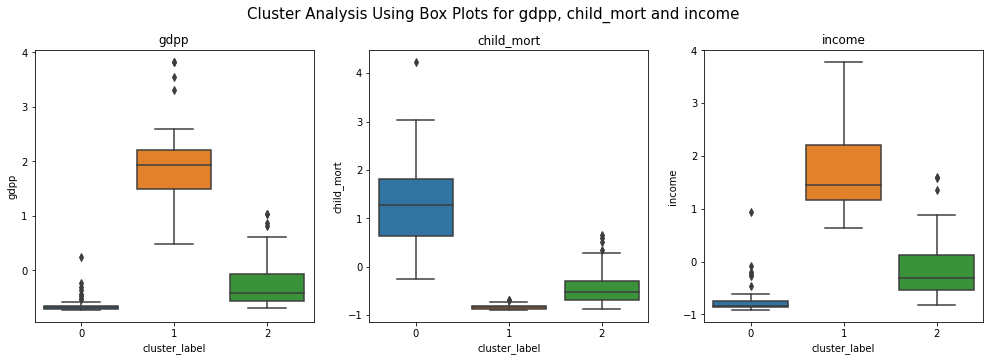

In [50]:
# Using box plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Box Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.boxplot(x='cluster_label', y='gdpp',
            data=scaled_country_kmeans_3, ax=ax[0])
ax[0].set_title('gdpp')

sns.boxplot(x='cluster_label', y='child_mort',
            data=scaled_country_kmeans_3, ax=ax[1])
ax[1].set_title('child_mort')

sns.boxplot(x='cluster_label', y='income',
            data=scaled_country_kmeans_3, ax=ax[2])
ax[2].set_title('income')
plt.show()


##### Inferences

-  From the box plot:
    - For gdpp box plot:
        - Cluster 0 has very low gdpp rate overall, as the median and approx all the values are at bottom of the plot.
        -  Cluster 1 has has very high gdpp rate overall, as the median and approx all the values are at the top of the plot.
        - Cluster 2 has slightly high gdpp rate than cluster 0 and slightly low gdpp rate as compared to cluster 1, as the median and all the values lies in between the plot.
        
    - For child_mort plot:
        - Cluster 0 has very high child_mort rate overall, as the median and approx all the values are at top of the plot.
        -  Cluster 1 has has very low child_mort rate overall, as the median and approx all the values are at the bottom of the plot.
        - Cluster 3 has slightly low child_mort rate than cluster 0 and slightly high child_mort rate as compared to cluster 1, as the median and all the values lies in between the plot.
        
    - For income box plot:
        - Cluster 0 has very low income rate overall, as the median and approx all the values are at bottom of the plot.
        -  Cluster 1 has has very high income rate overall, as the median and approx all the values are at the top of the plot.
        - Cluster 2 has slightly high income rate than cluster 0 and slightly low income rate as compared to cluster 1, as the median and all the values lies in between the plot.
        
- Thus, we can conclude that:
    - Cluster 0 has low gdpp, high child_mort and low income rate overall. Hence, the countries that are in cluster 0 should be in direst need of help from the NGO and we can treat those countries as `Under-Developed Countries'.
    - Cluster 1 has exact opposite behaviour to that of cluster 0, those countries have high gdpp, low child_mort and high income. Hence such countries are richer and NGO should not prefer such countries. We can term there countries as `Developed Countries`.
    - Cluster 2 has all the mean values, thus we can treat such as `Developing Countries`. NGO can approach such countries based on certain business conditions or during disaster.

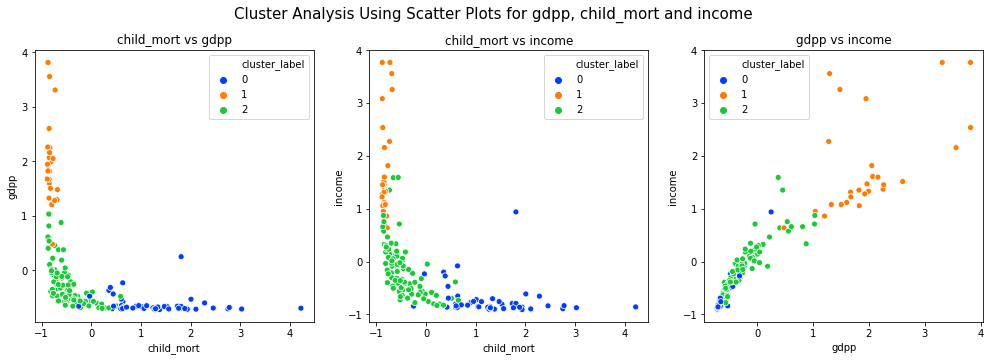

In [60]:
# Using scatter plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Scatter Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_label',
            data=scaled_country_kmeans_3, palette="bright", ax=ax[0])
ax[0].set_title('child_mort vs gdpp')

sns.scatterplot(x='child_mort', y='income', hue='cluster_label',
            data=scaled_country_kmeans_3, palette="bright", ax=ax[1])
ax[1].set_title('child_mort vs income')

sns.scatterplot(x='gdpp', y='income', hue='cluster_label',
            data=scaled_country_kmeans_3, palette="bright", ax=ax[2])
ax[2].set_title('gdpp vs income')
plt.show()

##### Inferences:
- All the above considerations and conclusion from box plots are confirmed after observing the scatter plot.
- Almost all the values for cluster 0 are at the right bottom, almost all the values of cluster 1 are at top left and almost all the values for cluster 2 are balanced from the relation between child_mort and gdpp. The same case is observed for the relation between child_mort and income.
- There is a linear relationship observed between gdpp and income. The respective cluster has values based on the above analysis.
- Hence, we can conclude that:
    - Countries in Cluster 0 are `Under-Developed Countries` and might be in direst need of aid from the NGO.
    - Countries in Cluster 1 are richer and `Developed Countries`.  NGO should not approach such countries for the aid.
    - Countries in Cluster 2 are `Developing Countries`, and NGO can approach such countries under sever circumstances or based on business decisions.

#### K-Means Clustering Using 4 Clusters

In [51]:
# model with k=4
kmeans_4_clusters = KMeans(n_clusters=4, max_iter=500, random_state=100)
kmeans_4_clusters.fit(scaled_country_data)

KMeans(max_iter=500, n_clusters=4, random_state=100)

In [52]:
# Making a copy of a dataframe and assigning the cluster labels into a column
scaled_country_kmeans_4 = scaled_country_data[:]
scaled_country_kmeans_4['cluster_label'] = kmeans_4_clusters.labels_
scaled_country_kmeans_4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,1
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,2
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,2
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,1
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,2


In [53]:
# Let's print the the number of countries in each cluster
scaled_country_kmeans_4.cluster_label.value_counts()

2    80
1    48
0    30
3     9
Name: cluster_label, dtype: int64

##### Cluster Analysis

- We will analyze the data spread against the clusters using various visualizations possible.
- We will analyze the spread against gdpp, child_mort and income to find the country which is in direst need of help.
- The country having low gdpp, high chid_mort and low income might be in direst need of aid, hence we will identify such cluster and then conclude the result. 

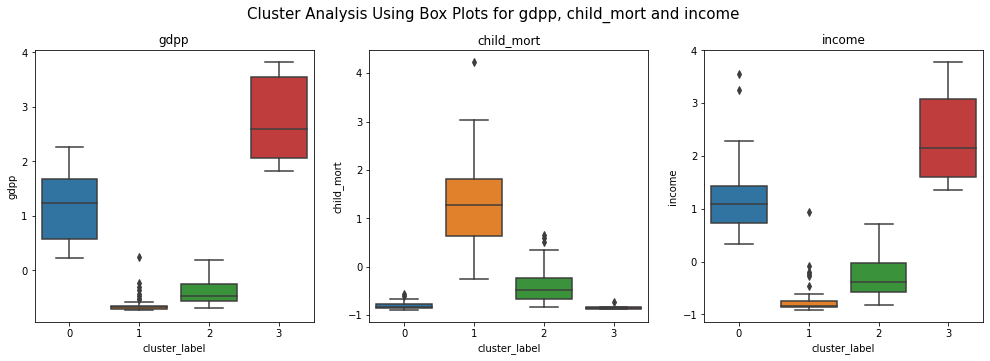

In [54]:
# Using box plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Box Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.boxplot(x='cluster_label', y='gdpp',
            data=scaled_country_kmeans_4, ax=ax[0])
ax[0].set_title('gdpp')

sns.boxplot(x='cluster_label', y='child_mort',
            data=scaled_country_kmeans_4, ax=ax[1])
ax[1].set_title('child_mort')

sns.boxplot(x='cluster_label', y='income',
            data=scaled_country_kmeans_4, ax=ax[2])
ax[2].set_title('income')
plt.show()


##### Inferences

-  From the box plot:
    - For gdpp box plot, if the median value is considered, then cluster 1 has countries have lowest gdpp rate and cluster 3 countries have highest gdpp rate. Cluster 2 is has gdpp slightly higher than cluster 1. Cluster 0 has gdpp slightly lower than cluster 3.
        
    - For child_mort plot, if the median value is considered, then cluster 1 has countries have highest child_mort rate and cluster 3 countries have lowest child_mort rate. Cluster 0 is has child_mort slightly higher than cluster 3. Cluster 2 has child_mort slightly lower than cluster 1.
        
    - For income box plot, if the median value is considered, then cluster 1 has countries have lowest income rate and cluster 3 countries have highest income rate. Cluster 2 is has income slightly higher than cluster 1. Cluster 0 has income slightly lower than cluster 3.
        
- Thus, we can conclude that:
    Amongst the 4 clusters, cluster 1 and 2 have lowest gdpp, highest child_mort rate and lowest income.
    Cluster 0 and 3 have highest gdpp, lowest child_mort rate and highest income.
    - Those countries in cluster 1 might be in direst need of aid. Countries in cluster 2 may also be in direst need of aid from the NGO, but these are slightly more developed countries than those in cluster 1.
    - Similarly, the countries in cluster 3 are the richest countries as compared to the countries in cluster 0.

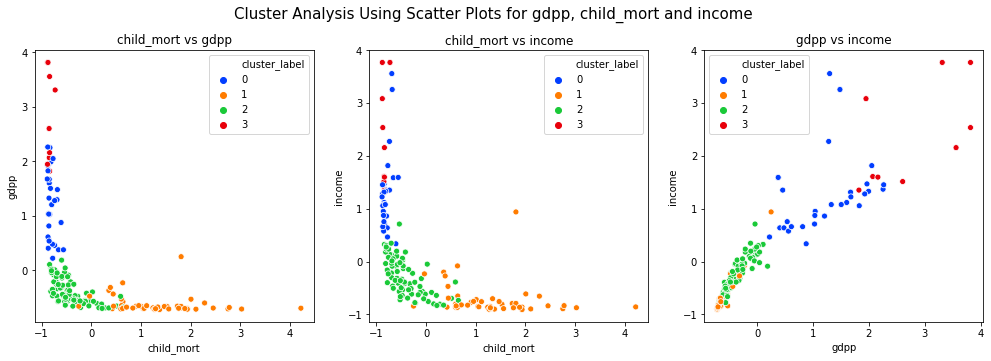

In [58]:
# Using scatter plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Scatter Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_label',
            data=scaled_country_kmeans_4, palette="bright", ax=ax[0])
ax[0].set_title('child_mort vs gdpp')

sns.scatterplot(x='child_mort', y='income', hue='cluster_label',
            data=scaled_country_kmeans_4, palette="bright", ax=ax[1])
ax[1].set_title('child_mort vs income')

sns.scatterplot(x='gdpp', y='income', hue='cluster_label',
            data=scaled_country_kmeans_4, palette="bright", ax=ax[2])
ax[2].set_title('gdpp vs income')
plt.show()

##### Inferences:
- All the above considerations and conclusion from box plots are confirmed after observing the scatter plot.
- For child_mort against gdpp and income, Cluster 1 is formed for low gdpp and high child_mort rate. Cluster 2 countries have almost similar distribution, but their gdpp is slightly higher and child_mort rate is slightly lower. Cluster 3 countries have negligible child_mort rate and very high gdpp as compared to cluster 0.
- There is a linear relationship observed between gdpp and income. Cluster 1 values are at bottom left, cluster 2 and cluster 0 values are in between and cluster 3 are at top right, meaning highest gdpp and income.

#### Model Comparison

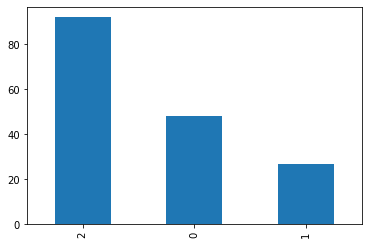

In [63]:
# Let's visualize the value counts of the clusters using bar graph
scaled_country_kmeans_3.cluster_label.value_counts().plot.bar()

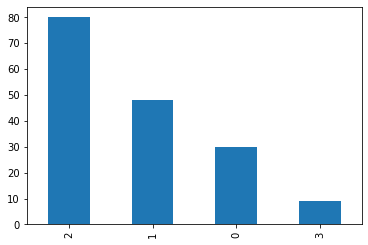

In [64]:
scaled_country_kmeans_4.cluster_label.value_counts().plot.bar()

#### Inferences and Conclusions:
- Both the clusters viz. cluster 3 and cluster 4 have successfully identified the countries which are in direst need, but there are certain points need to be considered before concluding the final number of clusters and their interpretations.
- If we have a close look at counts of the countries which are placed in certain clusters, there is a very slight number of difference between the countries that are placed in cluster of countries which are in direst need.
- Model with cluster 4 identified slightly less number of countries which might be in direst need of help than the model with cluster 3.
- Model with cluster 3 identified the countries as Under-Developed, Developing and Developed where as model with cluster 4 identified approx two cluster as Under-Developed and two clusters as Developed. Also, there are <10 countries only in the cluster 3 (Those countries are/might be highly developed).
- As per the business objective and irrespective of number of clusters, both the model have identified the number of countries which are in direst need of help, but `we can choose the performance of model with cluster 3 over model with cluster 4`, as cluster 4 is missing some countries which are in direst need of help.
- This decision again can be changed based on another conditions e.g. if we want to chose the some more countries which in future. might need help other than the previously identified countries. Also, if business feels there are too much countries identified by the model, in such cases preference of performance of model with 4 clusters can be preferred over model with cluster 3.
- But as our main objective is to identify various countries which might be in direst need of help, `we can consider model with 3 clusters i.e. K=3` for further identification of the countries which are in direst need of aid from the NGO. 

###### Identification of the countries which are in direst need of help using Model with 3 Clusters

- As we have previously analyzed that, countries in cluster 0 are `Under-Developed Countries`,countries in cluster 1 are `Developed Countries`, and countries in cluster 2 are `Developing Countries'.
- We are interested in identification of countries which are `Under-Developed`, hence we will identify such countries which are in direst need of aid from the NGO. Based on certain factors, we can conclude the top5 countries which are in direst need of help.

In [66]:
# Display the countries in cluster 0 viz Under-Developed Countries
scaled_country_kmeans_3[scaled_country_kmeans_3.cluster_label==0].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
Benin,1.808842,-0.558630,-0.573029,-0.595156,-0.839938,-0.654410,-0.987502,1.598107,-0.690463,0
Botswana,0.353908,-0.331218,-0.295247,-0.278418,-0.198711,0.107996,-1.517586,-0.045030,-0.368676,0
Burkina Faso,1.933196,-0.564781,-0.568729,-0.607054,-0.861722,-0.092213,-1.427359,1.936010,-0.700994,0


- There are certain factors needs to be considered if we want to choose the top5 or the most suitable countries for aid from NGO.
- If we want to consider sociological factors, then we can recommend the countries by analyzing the factors such as child_mort, life_expec, total_fer, etc. And if we focus on business objective, then we might consider child_mort column as the most suitable column for the identification of such countries.

- `If we want to consider the financial factors, then we can recommend other factors like gdpp, income, import, export, etc`.

- `After understanding the business objective, we might look for the help towards such countries which are financially weak. Hence we can consider financial factors first for the identification`.

In [69]:
# Identification of countries based on financial factors
priority_countries = scaled_country_kmeans_3.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False])
priority_countries.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Burundi,1.376093,-0.572671,-0.575427,-0.615532,-0.898922,0.428709,-1.449916,2.194407,-0.720789,0
Liberia,1.269149,-0.568993,-0.568824,-0.592939,-0.902497,-0.219360,-1.100286,1.372838,-0.715264,0
"Congo, Dem. Rep.",1.933196,-0.562419,-0.575638,-0.607537,-0.907580,1.235237,-1.472473,2.379922,-0.714862,0
Niger,2.107290,-0.567693,-0.580378,-0.606983,-0.896129,-0.496426,-1.325854,3.009349,-0.714056,0
Sierra Leone,3.027505,-0.568591,-0.561160,-0.610518,-0.873452,0.893648,-1.754433,1.492098,-0.711121,0


### Final Recommendation and Conclusion from K-Means Clustering Model
- We have identified top5 countries which are in direst need of help.
- The final recommended countries are:
    - Burundi
    - Liberia
    - Congo, Dem. Rep.
    - Niger
    - Sierra Leone
- We have identified these countries after building K-means model with 3 clusters and considering financial factors first.
- These countries have:
    - Low gdpp
    - Low Income
    - High child_mort rate

# Modeling using Hierarchical Clustering

- We have identified the countries which are in direst need of clustering using K-means algorithm.
- The major advantage of hierarchical clustering over K-Means clustering is we don't need to provide the K i.e. number of clusters beforehand. We can apply hierarchical clustering directly and then choose what number of clusters can be interpreted from the Dendrogram.

In [70]:
# Displaying the head of the data
scaled_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


##### Hierarchical Clustering using Single Linkage
- In single linkage, minimum distance between the clusters is preferred first while building dendrogram.

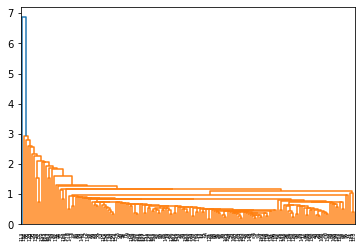

In [71]:
# single linkage
single_linkage = linkage(scaled_country_data, method="single", metric='euclidean')
dendrogram(single_linkage)
plt.show()

##### Hierarchical clustering using Complete Linkage
- In single linkage, maximum distance between the clusters is preferred first while building dendrogram resulting more efficient dendrogram.

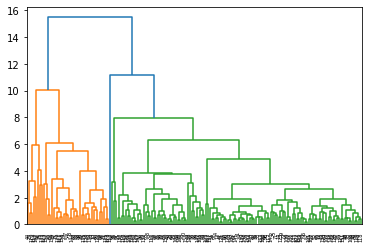

In [72]:
# complete linkage
complete_linkage = linkage(scaled_country_data, method="complete", metric='euclidean')
dendrogram(complete_linkage)
plt.show()

#### Inferences:
- From single linkage hierarchical clustering, the results are not easily interpretable as in single linkage the minimum distance is preferred first resulting clustering of very close clusters first.
- But from complete linkage hierarchical clustering, the results can be easily interpreted as we can choose 3 or 4 clusters using a cutting line.
- We can then analyze the clusters formed using 3 or 4 clusters and then using visualizations, we can take final decision for the countries which are in direst need of aid.

### Hierarchical Clustering using 3 Clusters

In [75]:
scaled_country_hierarchical_3 = scaled_country_data[:]
scaled_country_hierarchical_3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [76]:
# 3 clusters
cluster_labels = cut_tree(complete_linkage, n_clusters=3).reshape(-1, )
scaled_country_hierarchical_3['cluster_label'] = cluster_labels
scaled_country_hierarchical_3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,0
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,0
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,0


In [77]:
scaled_country_hierarchical_3.cluster_label.value_counts()

0    125
1     41
2      1
Name: cluster_label, dtype: int64

- Using 3 clusters, our model has identified 125 countries in cluster 0, 41 countries in cluster 1 and only one country in cluster 2.
- We have a lot of imbalance in the clusters, we will visualize and interpret the results identified from Hierarchical Clustering.

##### Cluster Analysis

- We will analyze the data spread against the clusters using various visualizations possible.
- We will analyze the spread against gdpp, child_mort and income to find the country which is in direst need of help.
- The country having low gdpp, high chid_mort and low income might be in direst need of aid, hence we will identify such cluster and then conclude the result. 

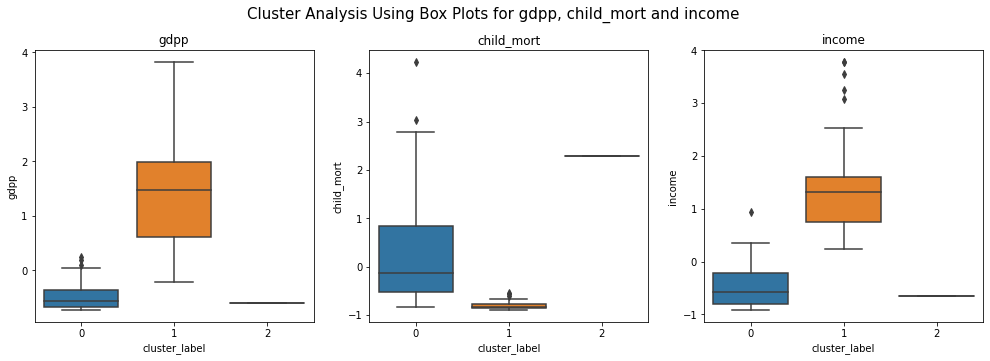

In [78]:
# Using box plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Box Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.boxplot(x='cluster_label', y='gdpp',
            data=scaled_country_hierarchical_3, ax=ax[0])
ax[0].set_title('gdpp')

sns.boxplot(x='cluster_label', y='child_mort',
            data=scaled_country_hierarchical_3, ax=ax[1])
ax[1].set_title('child_mort')

sns.boxplot(x='cluster_label', y='income',
            data=scaled_country_hierarchical_3, ax=ax[2])
ax[2].set_title('income')
plt.show()


##### Inferences

-  From the box plot:
    - For gdpp box plot:
        - Cluster 0 has low gdpp rate overall, cluster 1 covers huge range of countries for gdpp values. Though cluster 2 has only one country, it has low gdpp.
        
    - For child_mort plot:
        - Cluster 0 covers very range of child_mort rate overall, cluster 1 has low child_mort rate overall. Though cluster 2 has only one country, it has high gdpp.
        
    - For income box plot:
        - Cluster 0 has low income rate overall, cluster 1 covers huge range of countries for income values. Though cluster 2 has only one country, it has low income.
        
- Thus, we can conclude that:
    - Although the clusters are not identified efficiently,
        - Cluster 0 can be the countries that might be in direst need of help.
        - Cluster 1 has the developed and developing countries together.
        - Cluster 2 has only a single country which might be in direst need of help.

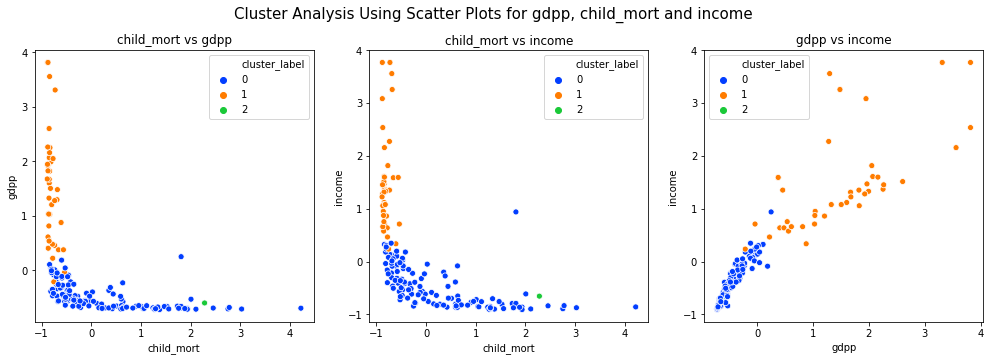

In [79]:
# Using scatter plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Scatter Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_label',
            data=scaled_country_hierarchical_3, palette="bright", ax=ax[0])
ax[0].set_title('child_mort vs gdpp')

sns.scatterplot(x='child_mort', y='income', hue='cluster_label',
            data=scaled_country_hierarchical_3, palette="bright", ax=ax[1])
ax[1].set_title('child_mort vs income')

sns.scatterplot(x='gdpp', y='income', hue='cluster_label',
            data=scaled_country_hierarchical_3, palette="bright", ax=ax[2])
ax[2].set_title('gdpp vs income')
plt.show()

##### Inferences:
- Cluster 0 is identified as the cluster with low value of child_mort and gdpp together. But it covers high values also, so there is no perfect conclusion from the behaviour of the cluster 0. This is also observed with cluster 1.
- Cluster 2 has only one country, which has high child_mort rate, low income and low gdpp.

##### Overall Conclusion:
- The clusters are not identified correctly if we compare the results with that of those from K-means model. 
- Still we can comment on the behavious of the cluster as:
    - Cluster 0 can be the countries that might be in direst need of help.
    - Cluster 1 has the countries which are developing/developed.
    - Cluster 2 has only a single country which might be in direst need of help.
- Let's begin the analysis for hierarchical model with 4 clusters.

### Hierarchical Clustering using 4 Clusters

In [80]:
scaled_country_hierarchical_4 = scaled_country_data[:]
scaled_country_hierarchical_4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [81]:
# 3 clusters
cluster_labels = cut_tree(complete_linkage, n_clusters=4).reshape(-1, )
scaled_country_hierarchical_4['cluster_label'] = cluster_labels
scaled_country_hierarchical_4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,0
Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,0
Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,0


In [82]:
scaled_country_hierarchical_4.cluster_label.value_counts()

0    125
1     33
2      8
3      1
Name: cluster_label, dtype: int64

- Using 4 clusters, our model has identified 125 countries in cluster 0, 33 countries in cluster 1, 8 countries in cluster 2 and only 1 country in cluster 3.
- We have a lot of imbalance in the clusters, we will visualize and interpret the results identified from Hierarchical Clustering.

##### Cluster Analysis

- We will analyze the data spread against the clusters using various visualizations possible.
- We will analyze the spread against gdpp, child_mort and income to find the country which is in direst need of help.
- The country having low gdpp, high chid_mort and low income might be in direst need of aid, hence we will identify such cluster and then conclude the result. 

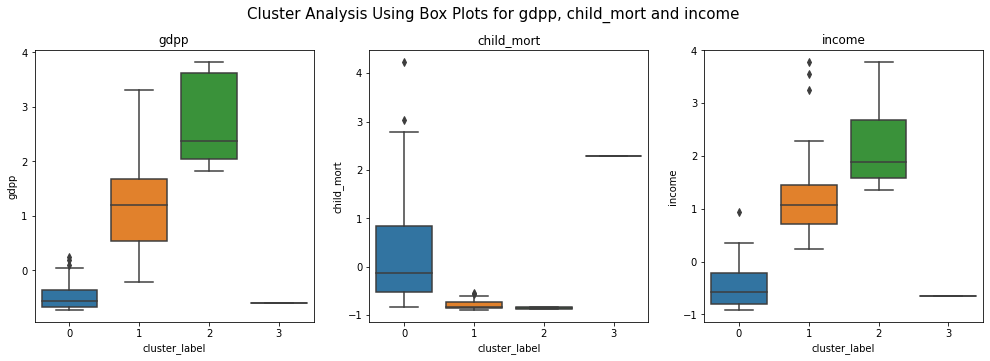

In [83]:
# Using box plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Box Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.boxplot(x='cluster_label', y='gdpp',
            data=scaled_country_hierarchical_4, ax=ax[0])
ax[0].set_title('gdpp')

sns.boxplot(x='cluster_label', y='child_mort',
            data=scaled_country_hierarchical_4, ax=ax[1])
ax[1].set_title('child_mort')

sns.boxplot(x='cluster_label', y='income',
            data=scaled_country_hierarchical_4, ax=ax[2])
ax[2].set_title('income')
plt.show()


##### Inferences

-  From the box plot:
    - For gdpp box plot:
        - Cluster 0 has low gdpp rate overall, cluster 1 and 2 cover huge range of countries for gdpp values. Though cluster 3 has only one country, it has low gdpp.
        
    - For child_mort plot:
        - Cluster 0 covers very range of child_mort rate overall, cluster 1 and 2 have low child_mort rate overall. Though cluster 2 has only one country, it has high gdpp.
        
    - For income box plot:
        - Cluster 0 has low income rate overall, cluster 1 have middle range income rates and 2 cover high values for income rates. Though cluster 2 has only one country, it has low income.
        
- Thus, we can conclude that:
    - Cluster 0 can be the countries that might be in direst need of help.
    - Cluster 2 has the countries which are richer.
    - Cluster 1 has the countries which are developing.
    - Cluster 3 has only a single country which might be in direst need of help.

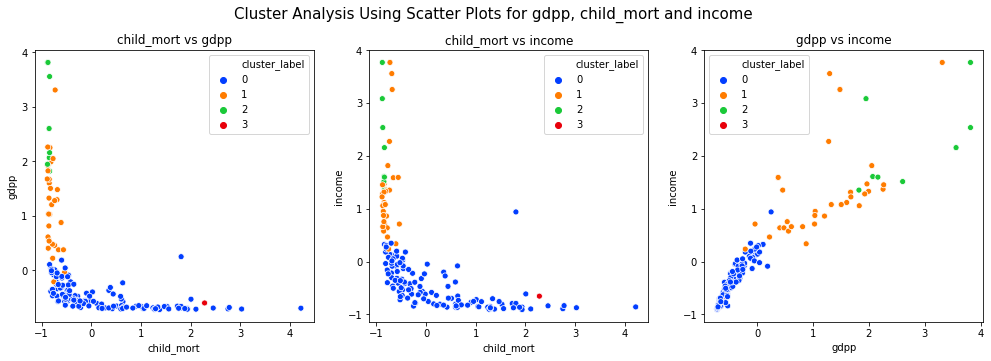

In [84]:
# Using scatter plot plot for cluster_label to visualize the spread of the data
fig, ax = plt.subplots(1,3,figsize=(17, 5))

fig.set_constrained_layout(True)
fig.suptitle('Cluster Analysis Using Scatter Plots for gdpp, child_mort and income',fontsize=15,y=1)

sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_label',
            data=scaled_country_hierarchical_4, palette="bright", ax=ax[0])
ax[0].set_title('child_mort vs gdpp')

sns.scatterplot(x='child_mort', y='income', hue='cluster_label',
            data=scaled_country_hierarchical_4, palette="bright", ax=ax[1])
ax[1].set_title('child_mort vs income')

sns.scatterplot(x='gdpp', y='income', hue='cluster_label',
            data=scaled_country_hierarchical_4, palette="bright", ax=ax[2])
ax[2].set_title('gdpp vs income')
plt.show()

##### Inferences:
- Cluster 0 is identified as the cluster with low value of child_mort and gdpp together. Although, it covers high range of values, we can say that cluster 1 and cluster 2 covers the countries which have low child_mort rate and high gdpp.
- Cluster 2 has only one country, which has high child_mort rate, low income and low gdpp.

##### Overall Conclusion:
    - Cluster 0 can be the countries that might be in direst need of help.
    - Cluster 2 has the countries which are richer.
    - Cluster 1 has the countries which are developing.
    - Cluster 3 has only a single country which might be in direst need of help.

##### Model Comparison for Hierarchical Clustering with 3 clusters and 4 clusters

- From model with 3 clusters, we have seen that in cluster 0, there are certain countries which are in direst need of help and in cluster 1, richer countries are present.
- From model with 4 clusters, clusters formed are under-developing countries, developing countries, developed countries.
- In both the clusters, there is a cluster with single country which might be in direst need of aid.
- `So we can say that both the clusters are not performing very well for the identification of the countries which are in direst need of help`.

## Final Conclusions And Recommendations:
- We have seen that, clusters are identified very well in K-means Clustering as compared to Hierarchical Clustering.
- Also, based on certain decisions, we have concluded that the K-Means clustering model with 3 clusters is giving satisfactory results based on the business objective for the identification of the countries which are in direst need of aid from the NGO as compared to the K-Means model with 4 clusters.

In [91]:
priority_countries.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
country,,,,,,,,,,
Burundi,1.376093,-0.572671,-0.575427,-0.615532,-0.898922,0.428709,-1.449916,2.194407,-0.720789,0
Liberia,1.269149,-0.568993,-0.568824,-0.592939,-0.902497,-0.219360,-1.100286,1.372838,-0.715264,0
"Congo, Dem. Rep.",1.933196,-0.562419,-0.575638,-0.607537,-0.907580,1.235237,-1.472473,2.379922,-0.714862,0
Niger,2.107290,-0.567693,-0.580378,-0.606983,-0.896129,-0.496426,-1.325854,3.009349,-0.714056,0
Sierra Leone,3.027505,-0.568591,-0.561160,-0.610518,-0.873452,0.893648,-1.754433,1.492098,-0.711121,0
Madagascar,0.595154,-0.565409,-0.581714,-0.606267,-0.863956,0.095661,-1.100286,1.094565,-0.710316,0
Mozambique,1.560136,-0.562884,-0.578208,-0.604565,-0.890320,-0.013458,-1.810825,1.730618,-0.709970,0
Central African Republic,2.753928,-0.569857,-0.580493,-0.612590,-0.891996,-0.547664,-2.600313,1.498724,-0.708417,0
Malawi,1.298994,-0.565286,-0.573493,-0.608119,-0.884064,0.409732,-1.968722,1.564979,-0.707669,0


- We also recommended some top countries which might be in need based on various factors.
- The final recommended countries are:
    - Burundi
    - Liberia
    - Congo, Dem. Rep.
    - Niger
    - Sierra Leone, etc.
- We have identified these countries after building K-means model with 3 clusters and considering financial factors first.
- These countries have:
    - Low gdpp
    - Low Income
    - High child_mort rate